# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

* A replacement for NumPy to use the power of GPUs
* a deep learning research platform that provides maximum flexibility and speed##

# Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [1]:
from __future__ import print_function
import torch

In [2]:
print(torch.empty(5, 3))

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


In [3]:
print(torch.rand(5, 3))

tensor([[0.8625, 0.2529, 0.5211],
        [0.8635, 0.6421, 0.1744],
        [0.9226, 0.6184, 0.1665],
        [0.4976, 0.1892, 0.2390],
        [0.9143, 0.7330, 0.0176]])


In [4]:
print(torch.zeros(5, 3, dtype=torch.long))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.2477, 1.2342, 0.2303],
        [0.1922, 0.9653, 1.1332],
        [1.6768, 0.9445, 1.1281],
        [0.7569, 1.5604, 0.6452],
        [0.7973, 0.5371, 0.3075]])


In [6]:
x[:, 1]

tensor([0.5648, 0.7831, 0.7525, 0.9529, 0.4549])

In [7]:
x

tensor([[0.6021, 0.5648, 0.1673],
        [0.0946, 0.7831, 0.8641],
        [0.8059, 0.7525, 0.9560],
        [0.3911, 0.9529, 0.5922],
        [0.1192, 0.4549, 0.2840]])

## Autograd : automatic differentiation

In [8]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [9]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [10]:
print(y.grad_fn)

In [11]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [12]:
out.backward()

In [13]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Linear regression, go

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [15]:
x = torch.arange(-100, 100).float()
y = 3 * x + 5 + 50 * torch.rand(200)

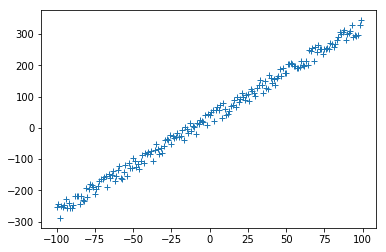

In [16]:
plt.plot(x.numpy(), y.numpy(), '+')

In [17]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        # You just have to define the forward function, and the backward function (where gradients are computed) 
        # is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.
        out = self.linear(x)
        return out

In [18]:
model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [19]:
# The learnable parameters of a model are returned by net.parameters()
list(model.parameters())

[Parameter containing:
 tensor([[-0.9755]], requires_grad=True), Parameter containing:
 tensor([-0.4806], requires_grad=True)]

In [20]:
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
                      
for epoch in range(50):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = model(x.view(-1, 1))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 10 == 0):
        print('epoch {}, loss {}, {}.x + {}, gradient w {} b {}'.format(
            epoch, 
            loss.data.item(), 
            model.linear.weight.item(), 
            model.linear.bias.item(), 
            model.linear.weight.grad.item(), 
            model.linear.bias.grad.item()
        ))
    
list(model.parameters())

epoch 0, loss 15041.0849609375, 2.2887091636657715.x + -0.5005911588668823, gradient w -13537.4140625 b -64.10334777832031
epoch 10, loss 1292.812255859375, 2.9654762744903564.x + -0.4346308708190918, gradient w -0.23761528730392456 b -66.00230407714844
epoch 20, loss 1288.464111328125, 2.9654974937438965.x + -0.3687010705471039, gradient w -0.009349584579467773 b -65.87045288085938
epoch 30, loss 1284.133544921875, 2.9655072689056396.x + -0.30290305614471436, gradient w -0.00943213701248169 b -65.73884582519531
epoch 40, loss 1279.81982421875, 2.965517044067383.x + -0.23723648488521576, gradient w -0.009965598583221436 b -65.60747528076172


[Parameter containing:
 tensor([[2.9655]], requires_grad=True), Parameter containing:
 tensor([-0.1782], requires_grad=True)]

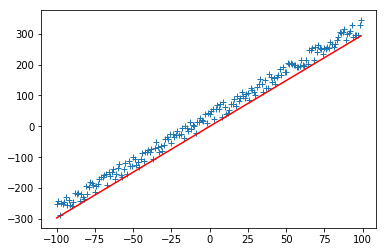

In [21]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), model(x.view(-1, 1)).view(-1).detach().numpy(), 'r')

## Let's try a square poly

In [22]:
x = torch.arange(0, 10, 0.001)
y = torch.pow(x, 2) + 10*torch.rand(10000)

In [23]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, 3)], 1)

First, cheat by building a x^2 feature to input in the model

In [24]:
make_features(x)

tensor([[ 0.0000,  0.0000],
        [ 0.0010,  0.0000],
        [ 0.0020,  0.0000],
        ...,
        [ 9.9970, 99.9400],
        [ 9.9980, 99.9600],
        [ 9.9990, 99.9800]])

In [25]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc(x)
        return x

In [26]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)
                      
for epoch in range(10001):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = net(make_features(x))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 1000 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data.item()))
    
list(net.parameters())

epoch 0, loss 4765.95654296875
epoch 1000, loss 11.58499526977539
epoch 2000, loss 10.718596458435059
epoch 3000, loss 10.343769073486328
epoch 4000, loss 10.158957481384277
epoch 5000, loss 10.04851245880127
epoch 6000, loss 9.96805191040039
epoch 7000, loss 9.900506019592285
epoch 8000, loss 9.839280128479004
epoch 9000, loss 9.7817964553833
epoch 10000, loss 9.72701644897461


[Parameter containing:
 tensor([[1.5000, 0.8723]], requires_grad=True), Parameter containing:
 tensor([1.4172], requires_grad=True)]

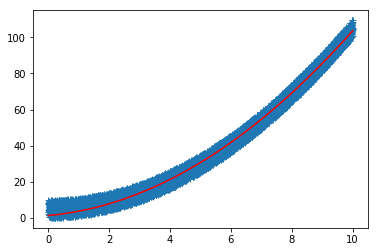

In [27]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), net(make_features(x)).view(-1).detach().numpy(), 'r')

Now try only with one input and multilayer net

In [28]:
class MultiNet(nn.Module):

    def __init__(self):
        super(MultiNet, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [29]:
mnet = MultiNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(mnet.parameters(), lr=0.0001)
                      
for epoch in range(10001):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = mnet(x.view(-1, 1))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 1000 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data.item()))
    
#list(mnet.parameters())

epoch 0, loss 2397.814208984375
epoch 1000, loss 49.04350662231445
epoch 2000, loss 20.247533798217773
epoch 3000, loss 13.699862480163574
epoch 4000, loss 12.075587272644043
epoch 5000, loss 11.13798999786377
epoch 6000, loss 10.417102813720703
epoch 7000, loss 9.776984214782715
epoch 8000, loss 9.284195899963379
epoch 9000, loss 8.998805046081543
epoch 10000, loss 8.824606895446777


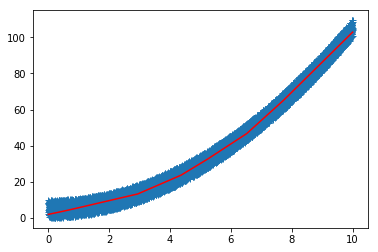

In [30]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), mnet(x.view(-1, 1)).view(-1).detach().numpy(), 'r')

Both converge to the same loss, though the feature one converges faster

## Let's try a sine function

In [31]:
x = torch.arange(0, 10, 0.01)
y = torch.sin(x) + 0.5*torch.rand(1000)

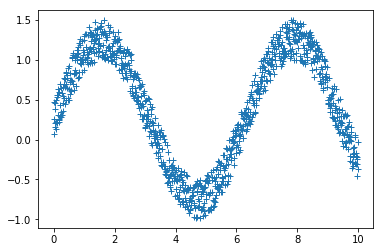

In [32]:
plt.plot(x.numpy(), y.numpy(), '+')

In [33]:
class SinNet(nn.Module):

    def __init__(self):
        super(SinNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
snet = SinNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(snet.parameters(), lr=0.0001)
                      
for epoch in range(10001):
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = snet(x.view(-1, 1))
    loss = criterion(output, y.view(-1, 1))
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    if(epoch % 1000 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data.item()))

epoch 0, loss 0.5501269698143005
epoch 1000, loss 0.25346702337265015
epoch 2000, loss 0.1394960731267929
epoch 3000, loss 0.05946424975991249
epoch 4000, loss 0.027527203783392906
epoch 5000, loss 0.022066345438361168
epoch 6000, loss 0.021339740604162216
epoch 7000, loss 0.021238267421722412
epoch 8000, loss 0.021192317828536034
epoch 9000, loss 0.020872458815574646
epoch 10000, loss 0.020823821425437927


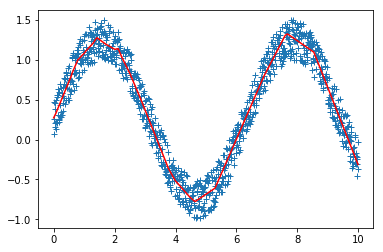

In [35]:
plt.plot(x.numpy(), y.numpy(), '+', x.numpy(), snet(x.view(-1, 1)).view(-1).detach().numpy(), 'r')